In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing all datasets
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.shape

(42000, 785)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_test.shape

(28000, 784)

In [7]:
y_train = df_train['label']

In [8]:
X_train = df_train.drop(columns=['label'],axis=1)

In [9]:
X_train.shape

(42000, 784)

In [10]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)

In [11]:
#Improting the PCA module
from sklearn.decomposition import PCA

In [12]:
pca = PCA(0.85, random_state=42)

In [13]:
#Doing the PCA on the train data
X_train_85 = pca.fit_transform(X_train)

In [14]:
X_train_85.shape

(42000, 180)

In [15]:
pca.n_components_

180

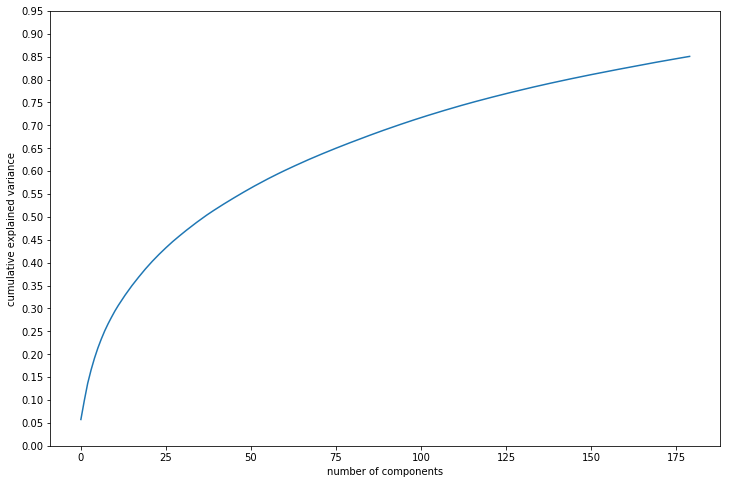

In [16]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
#plt.xticks(range(0,784,20),range(784))
plt.yticks(np.arange(0, 1, step=0.05))
plt.show()

In [17]:
from sklearn import linear_model

In [18]:
#mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs',random_state=42,max_iter=50).fit(X_train_85, y_train)    
#mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='sag',random_state=42,max_iter=300).fit(X_train_85, y_train)    
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg',random_state=42,max_iter=50).fit(X_train_85, y_train)    

In [19]:
df_test = standard_scaler.transform(df_test)

In [20]:
df_test_85 = pca.transform(df_test)

In [21]:
df_test_85.shape

(28000, 180)

In [22]:
predicted_test_labels = mul_lr.predict(df_test_85)
data_dict = {'ImageId':range(1,len(predicted_test_labels)+1),'Label':predicted_test_labels}
test_labels = pd.DataFrame(data_dict)
test_labels.to_csv(r'sub.csv',index = False)